In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.metrics import accuracy_score

import pickle
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'  # fix error on MAC_OS when using light gbm, xgboost
from sklearn.metrics import mean_squared_error

import lightgbm
sns.set(style='white', context='notebook', palette='deep')


## read input

with open('./data/X.pickle', 'rb') as handle:
    X = pickle.load(handle)
    
with open('./data/y.pickle', 'rb') as handle:
    y = pickle.load(handle)

/anaconda3/envs/py36_env/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
X.head()

,Age,Fare,Parch,Sex,SibSp,Fsize,Single,SmallF,MedF,LargeF,...,T_STONO,T_STONO2,T_STONOQ,T_SWPP,T_WC,T_WEP,T_X,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,0,0,1,2,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,4.266662,0,1,1,2,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,0,1,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,35.0,3.972177,0,1,1,2,0,1,0,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [3]:
print(Counter(y))
y[:5]

Counter({0: 413, 1: 268, 2: 200})


0    2
1    2
2    1
3    1
4    0
Name: value, dtype: int64

## objective="multiclass"

In [4]:

num_trees = 1
max_depth_tree  = 1

multiclass_model = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclass",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

multiclass_model.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])

[1]	train's multi_error: 0.38933


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=1,
        metric='multi_error', min_child_samples=1, min_child_weight=0,
        min_split_gain=0.0, n_estimators=1, n_jobs=-1, num_class=3,
        num_leaves=31, objective='multiclass', random_state=1,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

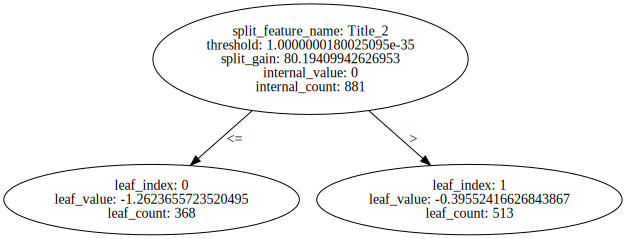

In [5]:
lightgbm.create_tree_digraph(multiclass_model, tree_index=0, show_info=["split_gain",
                                                  "internal_value", "internal_count", "leaf_count"])

## objective="multiclassova"

In [10]:
mutilclassova_model = lightgbm.LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=max_depth_tree,
        min_child_samples=1, min_child_weight=0, min_split_gain=0.0,
        n_estimators=num_trees, n_jobs=-1, num_leaves=31, metric= "multi_error" ,objective="multiclassova",num_class =3,
        random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

mutilclassova_model.fit(X, y, verbose=1, eval_set=  [(X, y)], eval_names= ['train'])


[1]	train's multi_error: 0.38933


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=1, max_depth=1,
        metric='multi_error', min_child_samples=1, min_child_weight=0,
        min_split_gain=0.0, n_estimators=1, n_jobs=-1, num_class=3,
        num_leaves=31, objective='multiclassova', random_state=1,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=0)

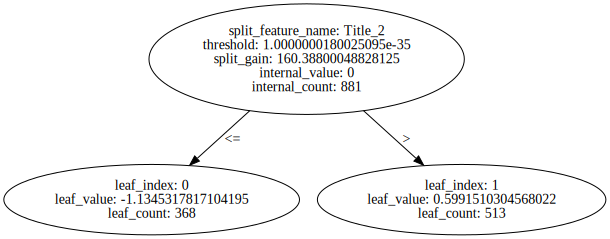

In [9]:
lightgbm.create_tree_digraph(mutilclassova_model, tree_index=0,  show_info=["split_gain", "internal_value", "internal_count", "leaf_count"])